In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow 

from tensorflow import keras
from keras.layers import Dense
from keras import layers as tfl
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping as ES
#from IPython.display import clear_output as cls
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
import tensorflow as tf

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory('//kaggle/input/multiclassimagedatasetairplanecar/Dataset/train',
                                                       validation_split=0.2,
                                                       subset='training',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(150,150),
                                                       batch_size=50
                                                      )

Found 3000 files belonging to 3 classes.
Using 2400 files for training.


2023-01-23 21:15:13.070228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:15:13.071239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:15:13.209308: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:15:13.210162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 21:15:13.210930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
class_labels = train_data.class_names
class_labels

['airplanes', 'cars', 'ship']

In [5]:
class_size = [len(os.listdir('/kaggle/input/multiclassimagedatasetairplanecar/Dataset/train/' + name)) for name in class_labels]
class_size

[1000, 1000, 1000]

In [6]:
val_data = tf.keras.utils.image_dataset_from_directory('//kaggle/input/multiclassimagedatasetairplanecar/Dataset/train',
                                                      validation_split=0.2,
                                                       subset='validation',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(150,150),
                                                       batch_size=50
                                                      )

Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [7]:
test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/multiclassimagedatasetairplanecar/Dataset/test',
                                                      
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(150,150),
                                                       batch_size=50
                                                      )

Found 582 files belonging to 3 classes.


2023-01-23 21:17:26.181051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


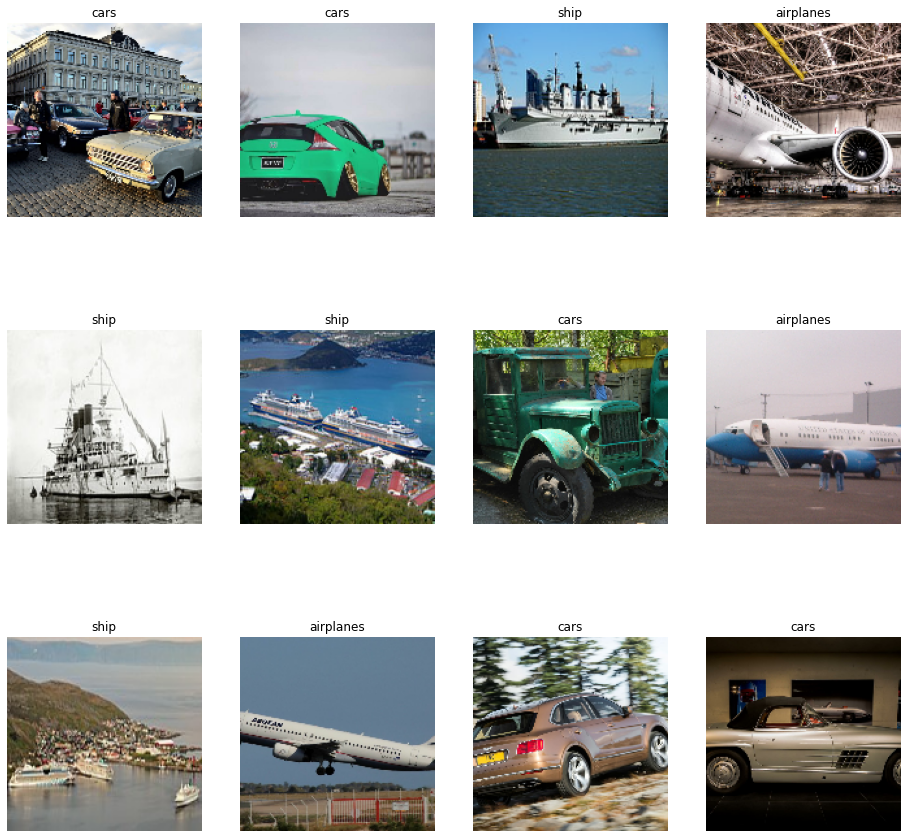

In [8]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[labels_batch[i]])
        plt.axis("off")

In [9]:
model = Sequential()
model.add(Conv2D(120,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(260,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Dropout(0.3))

model.add(Conv2D(364,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(class_labels),activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [11]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [12]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [13]:
history = model.fit(train_data,batch_size=50, epochs=15, verbose=1,
                     callbacks=[model_checkpoint_callback,es,reduce_lr],
                    validation_data=val_data)

Epoch 1/15


2023-01-23 21:18:37.439010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


48/48 [==============================] - 29s 333ms/step - loss: 12.0508 - accuracy: 0.6396 - val_loss: 26.4231 - val_accuracy: 0.4117
Epoch 2/15
48/48 [==============================] - 15s 262ms/step - loss: 1.8985 - accuracy: 0.7546 - val_loss: 4.2233 - val_accuracy: 0.5933
Epoch 3/15
48/48 [==============================] - 15s 274ms/step - loss: 1.3947 - accuracy: 0.8029 - val_loss: 1.0800 - val_accuracy: 0.7417
Epoch 4/15
48/48 [==============================] - 15s 287ms/step - loss: 0.6184 - accuracy: 0.8454 - val_loss: 0.7543 - val_accuracy: 0.8383
Epoch 5/15
48/48 [==============================] - 14s 266ms/step - loss: 0.5707 - accuracy: 0.8650 - val_loss: 0.7382 - val_accuracy: 0.8567
Epoch 6/15
48/48 [==============================] - 14s 257ms/step - loss: 0.6184 - accuracy: 0.8892 - val_loss: 1.0670 - val_accuracy: 0.8033
Epoch 7/15
48/48 [==============================] - 14s 264ms/step - loss: 0.6328 - accuracy: 0.9033 - val_loss: 2.8122 - val_accuracy: 0.6633
Epoch 8/

In [15]:
model.evaluate(test_data)

12/12 [==============================] - 5s 190ms/step - loss: 3.1413 - accuracy: 0.6014


[3.141324996948242, 0.6013745665550232]

In [16]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(8, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(4, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,batch_size=50, epochs=50, verbose=1,
                     callbacks=[model_checkpoint_callback,es,reduce_lr],
                    validation_data=val_ds)

Epoch 1/50
48/48 [==============================] - 12s 72ms/step - loss: 2.3691 - accuracy: 0.2812 - val_loss: 1.7377 - val_accuracy: 0.3300
Epoch 2/50
48/48 [==============================] - 1s 29ms/step - loss: 1.4255 - accuracy: 0.4729 - val_loss: 1.4486 - val_accuracy: 0.3317
Epoch 3/50
48/48 [==============================] - 1s 28ms/step - loss: 1.1091 - accuracy: 0.5462 - val_loss: 0.9574 - val_accuracy: 0.5900
Epoch 4/50
48/48 [==============================] - 1s 28ms/step - loss: 0.9996 - accuracy: 0.5688 - val_loss: 0.8514 - val_accuracy: 0.6883
Epoch 5/50
48/48 [==============================] - 1s 28ms/step - loss: 0.8946 - accuracy: 0.6137 - val_loss: 1.0029 - val_accuracy: 0.5550
Epoch 6/50
48/48 [==============================] - 1s 28ms/step - loss: 0.8004 - accuracy: 0.6438 - val_loss: 1.1604 - val_accuracy: 0.4983
Epoch 7/50
48/48 [==============================] - 1s 29ms/step - loss: 0.7198 - accuracy: 0.6783 - val_loss: 1.1715 - val_accuracy: 0.4883
Epoch 8/50
4

In [19]:
model.evaluate(test_data)

12/12 [==============================] - 2s 65ms/step - loss: 0.2836 - accuracy: 0.9038


[0.2835996747016907, 0.9037800431251526]

In [20]:
score = model.evaluate(test_data)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

12/12 [==============================] - 2s 51ms/step - loss: 0.2836 - accuracy: 0.9038
Test loss: 0.2835996448993683
Test accuracy: 0.9037800431251526


In [21]:
true_labels = []
predicted_labels = []

for x, y in test_data:
    true_labels.append(y)
    predicted_labels.append(model.predict(x))

true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

In [22]:
predicted_labelsa=np.array(predicted_labels)

In [23]:
np.argmax(predicted_labels[7])

2

In [24]:
print(np.argmax(predicted_labels[3]))
print(true_labels[3])

2
2


In [25]:
test_classes = test_data.class_names
test_classes

['airplanes', 'cars', 'ships']

In [26]:
predicted_labels[12]

array([1.20470558e-08, 5.12117238e-10, 1.00000000e+00, 1.14788505e-36,
       2.35471963e-24, 1.25230554e-24, 3.10779568e-25, 5.47885395e-25,
       5.07108717e-28, 1.93207443e-26], dtype=float32)

In [27]:

class_names = test_data.class_names

In [28]:
class_labels = train_data.class_names
class_labels
print(class_names)
str(class_names[np.argmax(predicted_labels[i])])

['airplanes', 'cars', 'ships']


'cars'

In [29]:
print(class_names)
cls=np.arange(len(class_names))
print(cls)
str(class_names[np.argmax(predicted_labels[i])])
str(cls[np.argmax(predicted_labels[i])])


['airplanes', 'cars', 'ships']
[0 1 2]


'1'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


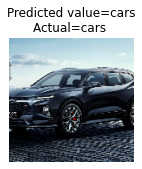

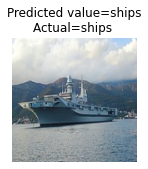

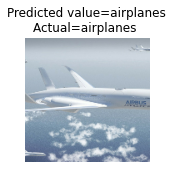

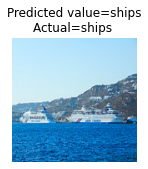

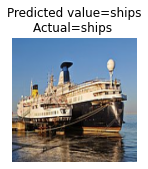

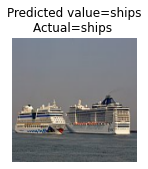

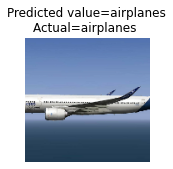

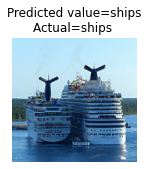

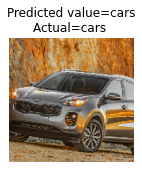

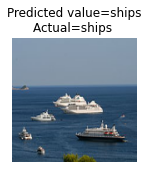

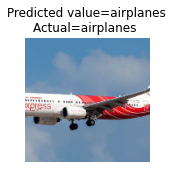

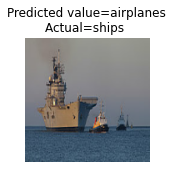

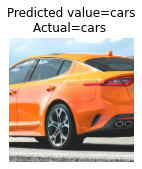

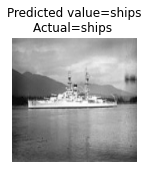

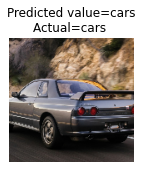

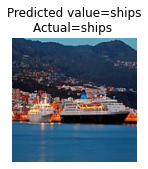

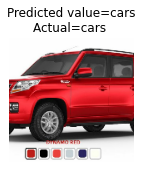

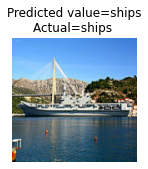

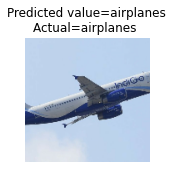

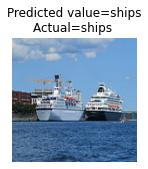

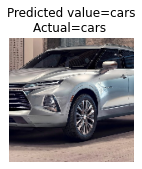

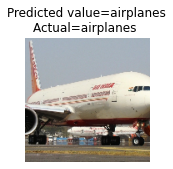

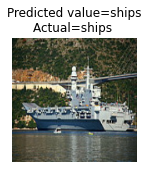

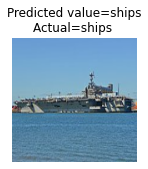

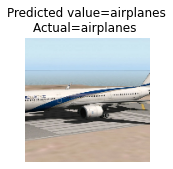

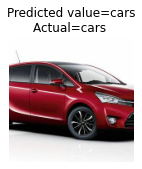

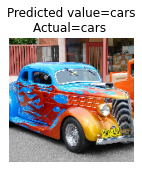

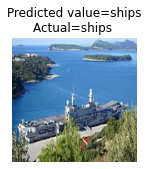

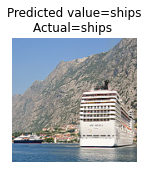

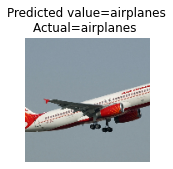

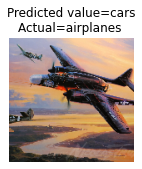

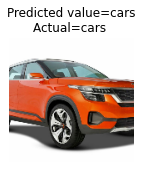

In [30]:
true_labels = []
predicted_labels = []

for x, y in test_data.take(1):
    true_labels.append(y)
    predicted_labels.append(model.predict(x))
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_labels = np.concatenate(predicted_labels, axis=0)
    for i in range(32):
        plt.figure(figsize=(16, 16))
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(x[i].numpy().astype("uint8"))               
        plt.title("Predicted value={}\nActual={} ".format (str(class_names[np.argmax(predicted_labels[i])]),class_names[true_labels[i]]))
        
        plt.axis("off")